<a href="https://colab.research.google.com/github/wafa17/Data-Mining/blob/main/Copy_of_FIX_SNA_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nltk

In [2]:
pip install Sastrawi

     |████████████████████████████████| 215kB 4.0MB/s 


In [3]:
import networkx as nx
import pandas as pd
from pandas import DataFrame
import csv
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import nltk
nltk.download('wordnet')
nltk.download('punkt')
import string
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/perkuliahan/smst 8/SNA/dataset1.csv')
df

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1.018640e+18,en,7/15/2018 23:14,Twitter for Android,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96199,WorldCup,Khaled Beydoun,KhaledBeydoun,Orión ?,NaN,366,809
1,1.018640e+18,en,7/15/2018 23:14,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96195,WorldCup,Khaled Beydoun,KhaledBeydoun,Dani McCabe,Dublin,246,536
2,1.018640e+18,en,7/15/2018 23:14,Twitter for Android,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96195,WorldCup,Khaled Beydoun,KhaledBeydoun,?EdUARdO ???,RIYADH,749,165
3,1.018640e+18,en,7/15/2018 23:14,Twitter Web Client,107,RT @FIFAWorldCup: adidas Golden Glove Award: \...,adidas Golden Glove Award Thibaut COURTOIS,0,18925,"BEL,WorldCup",FIFA World Cup,FIFAWorldCup,?? Pedrro ??,"Lisboa, Portugal",199,103
4,1.018640e+18,en,7/15/2018 23:14,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96195,WorldCup,Khaled Beydoun,KhaledBeydoun,Aminnnnaaaaa,NaN,298,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,1.018630e+18,en,7/15/2018 23:06,Twitter for Android,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96369,WorldCup,Khaled Beydoun,KhaledBeydoun,Tio Prassetio,"Pekalongan, Indonesia",184,182
4995,1.018630e+18,en,7/15/2018 23:06,Twitter for Android,182,"France, England and Belgium are next Door neig...",France England and Belgium are next Door neigh...,0,0,WorldCup,NaN,NaN,O'segun Aina ?,Federal Republic of Nigeria,1022,966
4996,1.018630e+18,en,7/15/2018 23:06,Twitter for iPhone,138,RT @Sporf: ? Ronaldo's Hattrick\r\n\r\n?? Germ...,Ronaldos Hattrick Germany Out In Groups Late W...,0,1136,NaN,SPORF,Sporf,Sean,"Curdworth, Birmingham",967,967
4997,1.018630e+18,en,7/15/2018 23:06,Twitter Lite,140,RT @MOSCO_LA_DOSCA: Don't use this bridge if y...,Do not use this bridge if you are acrophobic,0,13,"WorldCupFinal,WorldCup,Uyangthandana",CRAZY LUNATIC FRINJE,MOSCO_LA_DOSCA,Lindokuhle Lindor Hadebe,"Johannesburg, South Africa",70,899


In [6]:
#cek missing value
df.isnull().sum()

ID                     0
lang                   0
Date                   0
Source                 0
len                    0
Orig_Tweet             0
Tweet                  6
Likes                  0
RTs                    0
Hashtags             604
UserMentionNames     159
UserMentionID        159
Name                   1
Place               1438
Followers              0
Friends                0
dtype: int64

In [7]:
df = df.dropna() #untuk menghilangkan nilai NaN
df

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
1,1.018640e+18,en,7/15/2018 23:14,Twitter for iPhone,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96195,WorldCup,Khaled Beydoun,KhaledBeydoun,Dani McCabe,Dublin,246,536
2,1.018640e+18,en,7/15/2018 23:14,Twitter for Android,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96195,WorldCup,Khaled Beydoun,KhaledBeydoun,?EdUARdO ???,RIYADH,749,165
3,1.018640e+18,en,7/15/2018 23:14,Twitter Web Client,107,RT @FIFAWorldCup: adidas Golden Glove Award: \...,adidas Golden Glove Award Thibaut COURTOIS,0,18925,"BEL,WorldCup",FIFA World Cup,FIFAWorldCup,?? Pedrro ??,"Lisboa, Portugal",199,103
5,1.018640e+18,en,7/15/2018 23:14,Twitter for Android,129,RT @FIFAWorldCup: #FRA are the raining/reignin...,are the raining reigning champions Sorry not s...,0,8674,"FRA,WorldCup",FIFA World Cup,FIFAWorldCup,Yansen Hardjoko,"Tangerang, Banten, Indonesia",212,977
6,1.018640e+18,en,7/15/2018 23:14,Twitter for Android,139,RT @BelRedDevils: ?? Master of Ceremony ? \r\n...,Master of Ceremony,0,220,"DJEden,REDTOGETHER,redddevilsmascot,WorldCup","Belgian Red Devils,Eden Hazard","BelRedDevils,hazardeden10",AKholiq26,Indonesia,629,527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,1.018630e+18,en,7/15/2018 23:06,Twitter for iPad,140,RT @BeyLegion: Beyoncé performing in a blue je...,Beyonc performing in blue jersey to celebrate ...,0,458,"WorldCup,OTRII,Paris,Round2",BEYONCÉ LEGION,BeyLegion,"Steph, what's good? ??????",worldwide,2521,2346
4990,1.018630e+18,en,7/15/2018 23:06,Twitter for iPhone,102,RT @FIFAWorldCup: FIFA Young Player Award: \r\...,FIFA Young Player Award Kylian MBAPPE,0,9274,"FRA,WorldCup",FIFA World Cup,FIFAWorldCup,???,Japan,115,90
4992,1.018630e+18,en,7/15/2018 23:06,Twitter for Android,108,RT @8bitfootball: One of the highlights of thi...,One of the highlights of this final day,0,3563,WorldCup,"8bit-Football.com,Ronaldinho Gaúcho","8bitfootball,10Ronaldinho",Marconi Silva,"Betim, Brasil",8,62
4994,1.018630e+18,en,7/15/2018 23:06,Twitter for Android,140,"RT @KhaledBeydoun: Dear France, \r\n\r\nCongra...",Dear France Congratulations on winning the of ...,0,96369,WorldCup,Khaled Beydoun,KhaledBeydoun,Tio Prassetio,"Pekalongan, Indonesia",184,182


In [8]:
edges = pd.DataFrame(columns=('Source','Target','Strength'))

edges['Source'] = df['Name']
edges['Target'] = df['UserMentionID']
edges['Strength'] = df['Date']
edges

,Source,Target,Strength
1,Dani McCabe,KhaledBeydoun,7/15/2018 23:14
2,?EdUARdO ???,KhaledBeydoun,7/15/2018 23:14
3,?? Pedrro ??,FIFAWorldCup,7/15/2018 23:14
5,Yansen Hardjoko,FIFAWorldCup,7/15/2018 23:14
6,AKholiq26,"BelRedDevils,hazardeden10",7/15/2018 23:14
...,...,...,...
4989,"Steph, what's good? ??????",BeyLegion,7/15/2018 23:06
4990,???,FIFAWorldCup,7/15/2018 23:06
4992,Marconi Silva,"8bitfootball,10Ronaldinho",7/15/2018 23:06
4994,Tio Prassetio,KhaledBeydoun,7/15/2018 23:06


In [9]:
strengthLevel = 1  # Network connection strength level: the number of times in total each of the tweeters responded to or mentioned the other.

edges2 = edges.groupby(['Source','Target'])['Strength'].count()
edges2 = edges2.reset_index()
edges2 = edges2[edges2['Strength'] >= strengthLevel]

In [10]:
# Export nodes from the edges and add node attributes for both Sources and Targets.

users = df[['Name','Followers', 'Friends']]
users = users.sort_values(['Name','Followers'], ascending=[True, False])
users = users.drop_duplicates(['Name'], keep='first') 

ids = edges2['Source'].append(edges2['Target']).to_frame()
ids['Label'] = ids
ids.columns = ['Name', 'Label']
ids = ids.drop_duplicates(['Name'], keep='first') 
nodes = pd.merge(ids, users, on='Name', how='left')


In [11]:
users

,Name,Followers,Friends
3094,"#HalaMadrid ,Leafs TFC, Jays,Raptors ?",737,1125
775,#NorthForShort,1400,1410
3162,#PraCimaDelesBrasil,17,166
4524,#PrayForNigeria,355,1041
2957,#saveshadowhunters,3406,3739
...,...,...,...
3477,† Š?GGŸ †,892,736
804,•Fatihah Winchester•,114,81
2733,•khunNeon• #SY6 ?????????,156,90
4756,€arth ?,17,282


In [12]:
ids

,Name,Label
0,"#HalaMadrid ,Leafs TFC, Jays,Raptors ?","#HalaMadrid ,Leafs TFC, Jays,Raptors ?"
1,#NorthForShort,#NorthForShort
2,#PraCimaDelesBrasil,#PraCimaDelesBrasil
3,#PrayForNigeria,#PrayForNigeria
4,#saveshadowhunters,#saveshadowhunters
...,...,...
2862,paulpogba,paulpogba
2863,JonathanTKE187,JonathanTKE187
2887,"GordonRamsay,equipedefrance","GordonRamsay,equipedefrance"
2891,City_Watch,City_Watch


In [13]:
edges2.columns = ['From','To','Mentions Count']
nodes.columns = ['Id', 'Label', 'Followers', 'Friends']

In [14]:
edges2

,From,To,Mentions Count
0,"#HalaMadrid ,Leafs TFC, Jays,Raptors ?",HNS_CFF,1
1,#NorthForShort,"premierleague,paulpogba",1
2,#PraCimaDelesBrasil,EASPORTSFIFA,1
3,#PrayForNigeria,"ManUtd,paulpogba",1
4,#saveshadowhunters,noksindra,1
...,...,...,...
2905,•Fatihah Winchester•,KhaledBeydoun,1
2906,•khunNeon• #SY6 ?????????,FIFAWorldCup,1
2907,•khunNeon• #SY6 ?????????,ManUtd,1
2908,€arth ?,FIFAWorldCup,1


In [15]:
nodes

,Id,Label,Followers,Friends
0,"#HalaMadrid ,Leafs TFC, Jays,Raptors ?","#HalaMadrid ,Leafs TFC, Jays,Raptors ?",737.0,1125.0
1,#NorthForShort,#NorthForShort,1400.0,1410.0
2,#PraCimaDelesBrasil,#PraCimaDelesBrasil,17.0,166.0
3,#PrayForNigeria,#PrayForNigeria,355.0,1041.0
4,#saveshadowhunters,#saveshadowhunters,3406.0,3739.0
...,...,...,...,...
3069,paulpogba,paulpogba,NaN,NaN
3070,JonathanTKE187,JonathanTKE187,NaN,NaN
3071,"GordonRamsay,equipedefrance","GordonRamsay,equipedefrance",NaN,NaN
3072,City_Watch,City_Watch,NaN,NaN


In [16]:
# Export edges to csv files
edges2.to_csv('edges_mentions_for_visualization.csv', encoding='utf-8', index=False)

In [17]:
edges_mention = pd.read_csv('edges_mentions_for_visualization.csv')

In [18]:
G = nx.Graph()

for i in range(len(edges_mention)):
  G.add_edge(edges_mention['From'][i],edges_mention['To'][i])

# Deteksi Komunitas

In [19]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key      
      break

  return edge

In [20]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [21]:
# find communities in the graph
c = girvan_newman(G)

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

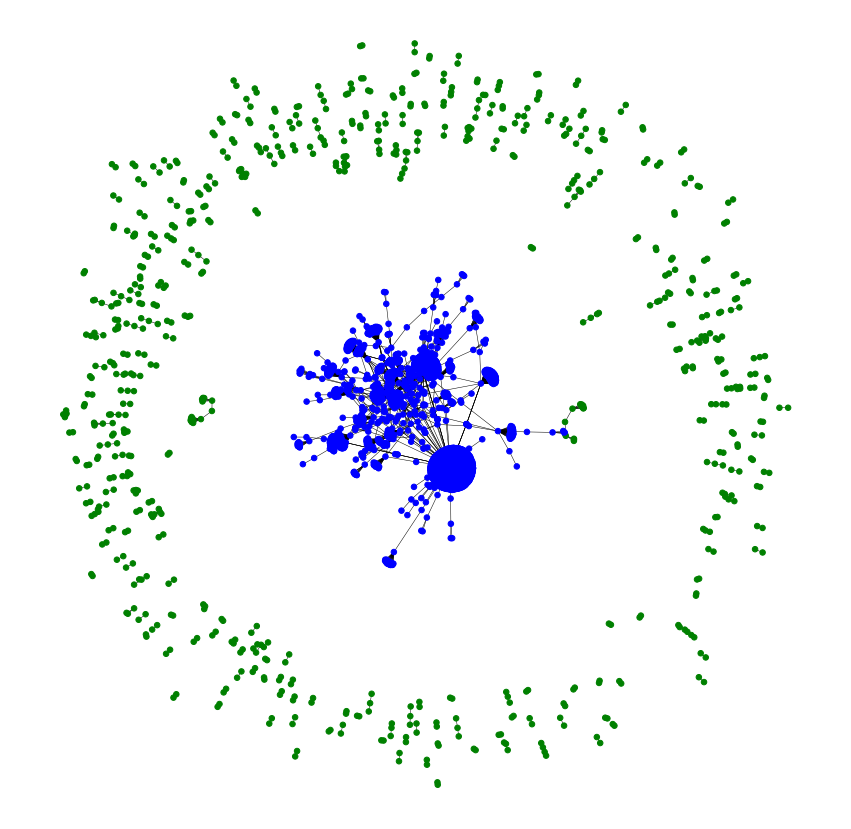

In [22]:
# plot the communities
color_map = []
node_blue = []
node_green = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
        node_blue.append(node)
    else: 
        color_map.append('green')  
        node_green.append(node) 

fig, ax = plt.subplots(figsize=(15,15))
nx.spring_layout(G,k=0.05)
sc = nx.draw(G, node_color=color_map, cmap='viridis', with_labels=False, ax=ax, node_size=30,width=0.5)
plt.axis('equal')
plt.show()

#Data Preprocessing

In [23]:
df['Orig_Tweet'] = df['Orig_Tweet'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df['Orig_Tweet'] = df['Orig_Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df['Orig_Tweet'] = df['Orig_Tweet'].str.replace('rt', '')
df['Orig_Tweet'] = df['Orig_Tweet'].str.replace('de', '')
df['Orig_Tweet'] = df['Orig_Tweet'].str.replace('la', '')
df['Orig_Tweet'] = df['Orig_Tweet'].str.replace('en', '')
df['Orig_Tweet'] = df['Orig_Tweet'].str.replace('el', '')
df['Orig_Tweet'] = df['Orig_Tweet'].str.replace('py', '')
df['Orig_Tweet'] = df['Orig_Tweet'].str.replace('gg', '')
df['Orig_Tweet'] = df['Orig_Tweet'].str.replace('gn', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [26]:
def remove_tweet_special(Orig_Tweet):
  Orig_Tweet = Orig_Tweet.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  Orig_Tweet = Orig_Tweet.encode('ascii', 'replace').decode('ascii')
  Orig_Tweet = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",Orig_Tweet ).split())
  return Orig_Tweet.replace("http://", " ").replace("https://", " ")
df['Orig_Tweet'] = df['Orig_Tweet'].apply(remove_tweet_special)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
def remove_number(Orig_Tweet):
  return  re.sub(r"\d+", "",Orig_Tweet)

  
df['Orig_Tweet'] = df['Orig_Tweet'].apply(remove_number)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [28]:
#remove punctuation
def remove_punctuation(Orig_Tweet):
    return Orig_Tweet.translate(str.maketrans("","",string.punctuation))

df['Orig_Tweet'] = df['Orig_Tweet'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(Orig_Tweet):
    return Orig_Tweet.strip()

df['Orig_Tweet'] = df['Orig_Tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(Orig_Tweet):
    return re.sub('\s+',' ',Orig_Tweet)

df['Orig_Tweet'] = df['Orig_Tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(Orig_Tweet):
    return re.sub(r"\b[a-zA-Z]\b", "",Orig_Tweet)

df['Orig_Tweet'] = df['Orig_Tweet'].apply(remove_singl_char)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [29]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# factory = StopWordRemoverFactory()
# stopword = factory.create_stop_word_remover()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(sentence):
  return stemmer.stem(sentence)

df['Orig_Tweet'] = df['Orig_Tweet'].apply(stemming).apply(stemming)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [30]:
df

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
1,1.018640e+18,en,7/15/2018 23:14,Twitter for iPhone,140,ar france congratutions winning team african c...,Dear France Congratulations on winning the of ...,0,96195,WorldCup,Khaled Beydoun,KhaledBeydoun,Dani McCabe,Dublin,246,536
2,1.018640e+18,en,7/15/2018 23:14,Twitter for Android,140,ar france congratutions winning team african c...,Dear France Congratulations on winning the of ...,0,96195,WorldCup,Khaled Beydoun,KhaledBeydoun,?EdUARdO ???,RIYADH,749,165
3,1.018640e+18,en,7/15/2018 23:14,Twitter Web Client,107,adidas goln glove award thibaut couois,adidas Golden Glove Award Thibaut COURTOIS,0,18925,"BEL,WorldCup",FIFA World Cup,FIFAWorldCup,?? Pedrro ??,"Lisboa, Portugal",199,103
5,1.018640e+18,en,7/15/2018 23:14,Twitter for Android,129,rainingreiing champions sorrynot sorry pun,are the raining reigning champions Sorry not s...,0,8674,"FRA,WorldCup",FIFA World Cup,FIFAWorldCup,Yansen Hardjoko,"Tangerang, Banten, Indonesia",212,977
6,1.018640e+18,en,7/15/2018 23:14,Twitter for Android,139,master ceremony,Master of Ceremony,0,220,"DJEden,REDTOGETHER,redddevilsmascot,WorldCup","Belgian Red Devils,Eden Hazard","BelRedDevils,hazardeden10",AKholiq26,Indonesia,629,527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,1.018630e+18,en,7/15/2018 23:06,Twitter for iPad,140,beyonc performing blue jersey cebrate frances win,Beyonc performing in blue jersey to celebrate ...,0,458,"WorldCup,OTRII,Paris,Round2",BEYONCÉ LEGION,BeyLegion,"Steph, what's good? ??????",worldwide,2521,2346
4990,1.018630e+18,en,7/15/2018 23:06,Twitter for iPhone,102,fifa young er award kylian mbappe,FIFA Young Player Award Kylian MBAPPE,0,9274,"FRA,WorldCup",FIFA World Cup,FIFAWorldCup,???,Japan,115,90
4992,1.018630e+18,en,7/15/2018 23:06,Twitter for Android,108,one highlights final day,One of the highlights of this final day,0,3563,WorldCup,"8bit-Football.com,Ronaldinho Gaúcho","8bitfootball,10Ronaldinho",Marconi Silva,"Betim, Brasil",8,62
4994,1.018630e+18,en,7/15/2018 23:06,Twitter for Android,140,ar france congratutions winning team african c...,Dear France Congratulations on winning the of ...,0,96369,WorldCup,Khaled Beydoun,KhaledBeydoun,Tio Prassetio,"Pekalongan, Indonesia",184,182


#Wordcloud

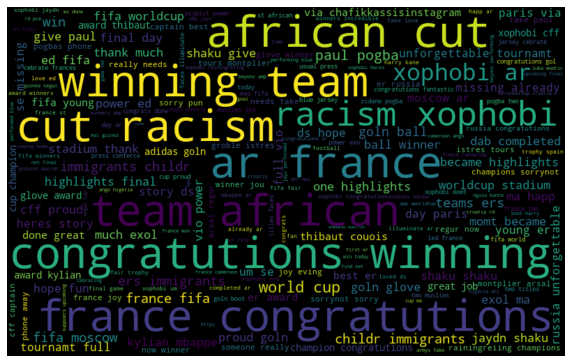

In [31]:
from wordcloud import WordCloud
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([Orig_Tweet for Orig_Tweet in df['Orig_Tweet'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [32]:
from collections import Counter
Counter(" ".join(df["Orig_Tweet"]).split()).most_common(10)

[('france', 1421),
 ('congratutions', 1212),
 ('winning', 1079),
 ('team', 1076),
 ('african', 1061),
 ('ar', 1036),
 ('cut', 1031),
 ('racism', 1031),
 ('xophobi', 1023),
 ('fifa', 252)]

#Evaluasi

In [33]:
data = DataFrame (node_blue,columns=['Name'])

In [34]:
data.head(5)

,Name
0,"#HalaMadrid ,Leafs TFC, Jays,Raptors ?"
1,HNS_CFF
2,#NorthForShort
3,"premierleague,paulpogba"
4,#PraCimaDelesBrasil


In [35]:
data

,Name
0,"#HalaMadrid ,Leafs TFC, Jays,Raptors ?"
1,HNS_CFF
2,#NorthForShort
3,"premierleague,paulpogba"
4,#PraCimaDelesBrasil
...,...
2292,† Š?GGŸ †
2293,•Fatihah Winchester•
2294,•khunNeon• #SY6 ?????????
2295,€arth ?


In [36]:
eval_blue = pd.merge(data, df , on="Name", how="left")

In [37]:
eval_blue.head(4)

,Name,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Place,Followers,Friends
0,"#HalaMadrid ,Leafs TFC, Jays,Raptors ?",1.018630e+18,en,7/15/2018 23:09,Twitter for Android,119.0,cff proud goln ball winner,So proud of the Golden Ball winner,0.0,3017.0,"BeProud,CRO,Family,WorldCup,Vatreni",HNS | CFF,HNS_CFF,Canada Toronto,737.0,1125.0
1,HNS_CFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#NorthForShort,1.018630e+18,en,7/15/2018 23:13,Twitter for Android,96.0,dab completed,Dab with the completed it,0.0,9698.0,WorldCup,"Premier League,Paul Pogba","premierleague,paulpogba",At The Trap •,1400.0,1410.0
3,"premierleague,paulpogba",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df['Orig_Tweet'] = df['Orig_Tweet'].str.replace('rt', '')
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('the', '')
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('de', '')
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('in', '')
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('to', '')
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('la', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('el', '')
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('en', '')
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('on', '')
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('of', '')
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('pl', '')
eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('and', '')
# eval_blue['Orig_Tweet'] = eval_blue['Orig_Tweet'].str.replace('en', '')

In [40]:
eval_blue.Orig_Tweet = eval_blue.Orig_Tweet.str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

In [41]:
top_N = 10
txt = eval_blue.Orig_Tweet.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')



# df['Orig_Tweet'] = df['Orig_Tweet'].apply(remove_punctuation)




words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)


stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

All frequencies, including STOPWORDS:
        Word  Frequency
0     france       1344
1  cgratutis       1176
2       team       1053
3        wng       1050
4    african       1046
5         ar       1027
6        cut       1023
7     racism       1023
8    xophobi       1023
9       fifa        236
